# Data augmentation
### Polega na zmianie obrazu w jakiś sposób tak żeby go zrotować/ przesunąć, pomaga to modelowi dostarczyć nowe dane które pomagają mu się uczyć

![picture](https://drive.google.com/uc?id=1y5CZAJL14h2VGgyYesOFblZevNVDv3_2)




# Batch normalization
### Polega na dodaniu warstw które mają normalizować dane.

![picture](https://drive.google.com/uc?id=1nVXyUHueworlse-Tt0f2xPtqhsCnGM7H)



# VGG network

### Sieć charakteryzuje się tym że występuje pare warstw konwolucyjnych zanim pojawi sie warstwa max pooling.

![picture](https://drive.google.com/uc?id=1A8bbVnDdWX0JRANT_pFg0uHmODA3v8AQ)



# No data augmentation, No batch normalization



In [18]:
import tensorflow as tf
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras import Input
from tensorflow.keras.layers import Conv2D, Dropout, Flatten, Dense, BatchNormalization, MaxPooling2D
import numpy as np
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [19]:
cifar10=tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train/255.0
x_test = x_test/255.0

y_train = y_train.flatten()
y_test = y_test.flatten()


print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)

x_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000,)


In [20]:
K=len(set(y_train))
print("Classes: ",K)

Classes:  10


In [21]:
i = Input(shape=x_train[0].shape)

x = Conv2D(32, (3, 3), activation='relu', padding ="same")(i)
#x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding ="same")(x)
#x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding ="same")(x)
#x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding ="same")(x)
#x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding ="same")(x)
#x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding ="same")(x)
#x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)


x = Flatten()(x) # spłaszamy wektor z 3 na 1 wymiarowy tak żeby mógł wejść do sieci neuronowej, nie chcemy używać tej warswy przy warstwach konwolucyjnych ponieważ usunęły by nam istotne informacje - "cechy"
x = Dropout(0.2)(x) # wyrzucamy losowe neurony
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x) # wyrzucamy losowe neurony
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [22]:
model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ['accuracy'])

r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 14s 7ms/step - loss: 1.5134 - accuracy: 0.4401 - val_loss: 1.1494 - val_accuracy: 0.5981
Epoch 2/15
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0138 - accuracy: 0.6409 - val_loss: 0.9141 - val_accuracy: 0.6787
Epoch 3/15
1563/1563 [==============================] - 10s 7ms/step - loss: 0.8218 - accuracy: 0.7088 - val_loss: 0.7709 - val_accuracy: 0.7323
Epoch 4/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6989 - accuracy: 0.7546 - val_loss: 0.7459 - val_accuracy: 0.7439
Epoch 5/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6192 - accuracy: 0.7832 - val_loss: 0.7081 - val_accuracy: 0.7582
Epoch 6/15
1563/1563 [==============================] - 10s 6ms/step - loss: 0.5511 - accuracy: 0.8067 - val_loss: 0.7325 - val_accuracy: 0.7511
Epoch 7/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.4927 - accuracy: 0.8265 - val_loss: 0.7376 - val_ac

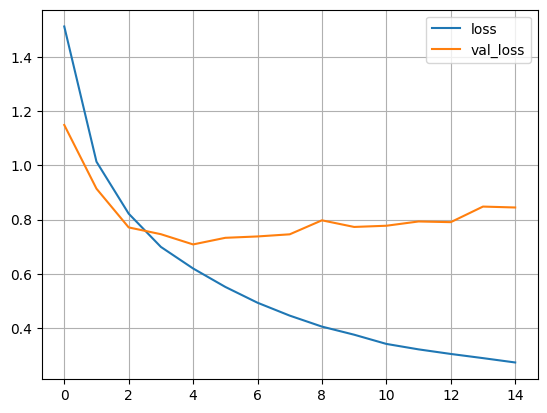

In [23]:
plt.plot(r.history['loss'], label="loss")
plt.plot(r.history['val_loss'],label ="val_loss")
plt.grid()
plt.legend()
plt.show()

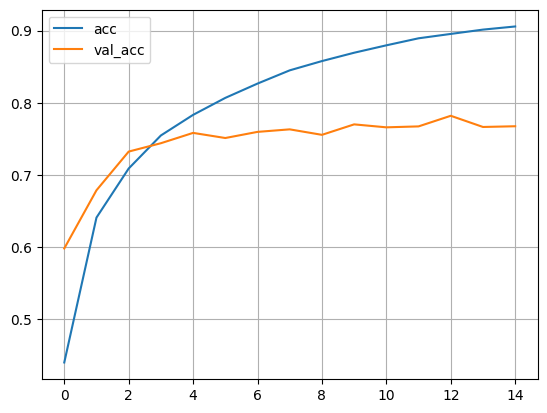

In [24]:
plt.plot(r.history['accuracy'], label="acc")
plt.plot(r.history['val_accuracy'],label ="val_acc")
plt.grid()
plt.legend()
plt.show()

313/313 [==============================] - 1s 2ms/step


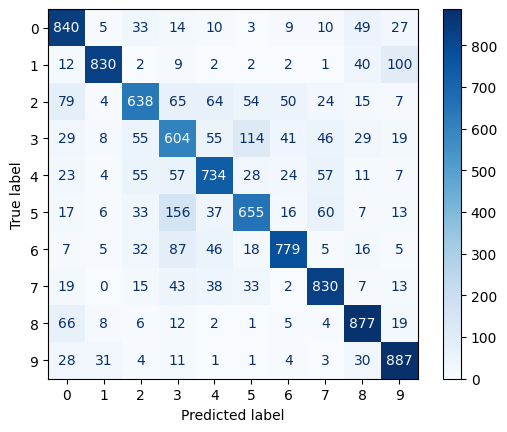

In [25]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Macierz konfuzji
cm = confusion_matrix(y_test, y_pred_labels)

# Wyświetlanie macierzy konfuzji
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# No data augmentation, Batch normalization


In [26]:
cifar10=tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train/255.0
x_test = x_test/255.0

y_train = y_train.flatten()
y_test = y_test.flatten()


print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)

x_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000,)


In [27]:
K=len(set(y_train))
print("Classes: ",K)

Classes:  10


In [28]:
i = Input(shape=x_train[0].shape)

x = Conv2D(32, (3, 3), activation='relu', padding ="same")(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding ="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding ="same")(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding ="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding ="same")(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding ="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)


x = Flatten()(x) # spłaszamy wektor z 3 na 1 wymiarowy tak żeby mógł wejść do sieci neuronowej, nie chcemy używać tej warswy przy warstwach konwolucyjnych ponieważ usunęły by nam istotne informacje - "cechy"
x = Dropout(0.2)(x) # wyrzucamy losowe neurony
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x) # wyrzucamy losowe neurony
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [29]:
model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ['accuracy'])

r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)


Epoch 1/15
1563/1563 [==============================] - 17s 9ms/step - loss: 1.2688 - accuracy: 0.5654 - val_loss: 1.0050 - val_accuracy: 0.6478
Epoch 2/15
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8289 - accuracy: 0.7145 - val_loss: 0.9384 - val_accuracy: 0.6747
Epoch 3/15
1563/1563 [==============================] - 16s 10ms/step - loss: 0.6827 - accuracy: 0.7661 - val_loss: 0.7056 - val_accuracy: 0.7556
Epoch 4/15
1563/1563 [==============================] - 12s 8ms/step - loss: 0.5744 - accuracy: 0.8035 - val_loss: 0.8438 - val_accuracy: 0.7276
Epoch 5/15
1563/1563 [==============================] - 12s 8ms/step - loss: 0.4930 - accuracy: 0.8327 - val_loss: 0.6723 - val_accuracy: 0.7831
Epoch 6/15
1563/1563 [==============================] - 12s 8ms/step - loss: 0.4202 - accuracy: 0.8547 - val_loss: 0.6625 - val_accuracy: 0.7921
Epoch 7/15
1563/1563 [==============================] - 13s 8ms/step - loss: 0.3536 - accuracy: 0.8781 - val_loss: 0.6339 - val_a

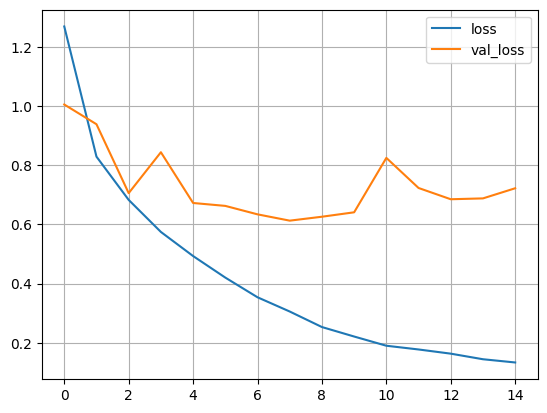

In [30]:
plt.plot(r.history['loss'], label="loss")
plt.plot(r.history['val_loss'],label ="val_loss")
plt.grid()
plt.legend()
plt.show()

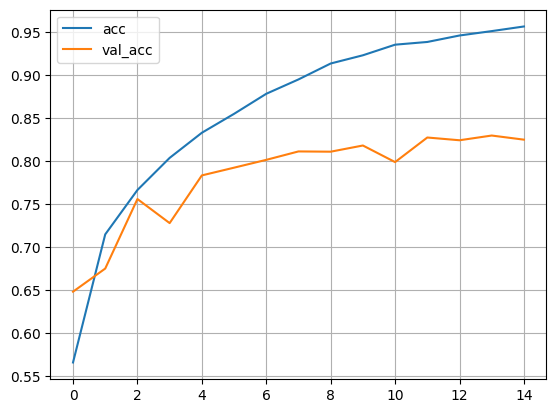

In [31]:
plt.plot(r.history['accuracy'], label="acc")
plt.plot(r.history['val_accuracy'],label ="val_acc")
plt.grid()
plt.legend()
plt.show()

313/313 [==============================] - 1s 2ms/step


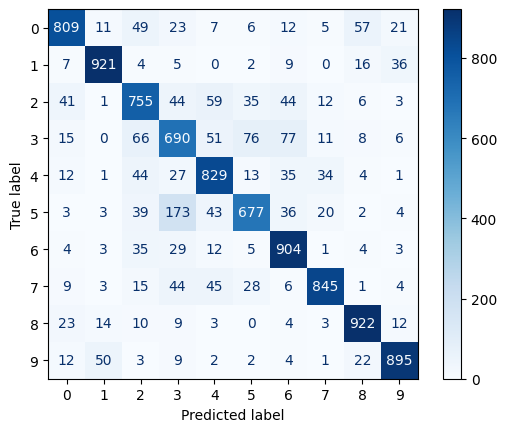

In [32]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Macierz konfuzji
cm = confusion_matrix(y_test, y_pred_labels)

# Wyświetlanie macierzy konfuzji
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Data augmenation, Batch normalization

In [33]:
cifar10=tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train/255.0
x_test = x_test/255.0

y_train = y_train.flatten()
y_test = y_test.flatten()


print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)

x_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000,)


In [34]:
K=len(set(y_train))
print("Classes: ",K)

Classes:  10


In [35]:
i = Input(shape=x_train[0].shape)

x = Conv2D(32, (3, 3), activation='relu', padding ="same")(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding ="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding ="same")(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding ="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding ="same")(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding ="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)


x = Flatten()(x) # spłaszamy wektor z 3 na 1 wymiarowy tak żeby mógł wejść do sieci neuronowej, nie chcemy używać tej warswy przy warstwach konwolucyjnych ponieważ usunęły by nam istotne informacje - "cechy"
x = Dropout(0.2)(x) # wyrzucamy losowe neurony
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x) # wyrzucamy losowe neurony
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [36]:
model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ['accuracy'])

In [37]:
batch_size=32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0]//batch_size
r = model.fit_generator(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=15)


Epoch 1/15


<ipython-input-37-29ee08250927>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=15)


1562/1562 [==============================] - 41s 23ms/step - loss: 1.4466 - accuracy: 0.4973 - val_loss: 1.0739 - val_accuracy: 0.6192
Epoch 2/15
1562/1562 [==============================] - 36s 23ms/step - loss: 0.9981 - accuracy: 0.6487 - val_loss: 1.0947 - val_accuracy: 0.6457
Epoch 3/15
1562/1562 [==============================] - 36s 23ms/step - loss: 0.8443 - accuracy: 0.7095 - val_loss: 0.7116 - val_accuracy: 0.7588
Epoch 4/15
1562/1562 [==============================] - 36s 23ms/step - loss: 0.7436 - accuracy: 0.7459 - val_loss: 0.7138 - val_accuracy: 0.7619
Epoch 5/15
1562/1562 [==============================] - 39s 25ms/step - loss: 0.6857 - accuracy: 0.7674 - val_loss: 0.6345 - val_accuracy: 0.7863
Epoch 6/15
1562/1562 [==============================] - 38s 24ms/step - loss: 0.6394 - accuracy: 0.7823 - val_loss: 0.7082 - val_accuracy: 0.7563
Epoch 7/15
1562/1562 [==============================] - 37s 24ms/step - loss: 0.5981 - accuracy: 0.7954 - val_loss: 0.6402 - val_accura

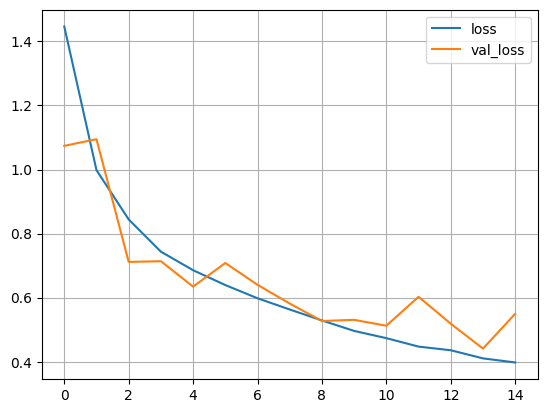

In [38]:
plt.plot(r.history['loss'], label="loss")
plt.plot(r.history['val_loss'],label ="val_loss")
plt.grid()
plt.legend()
plt.show()

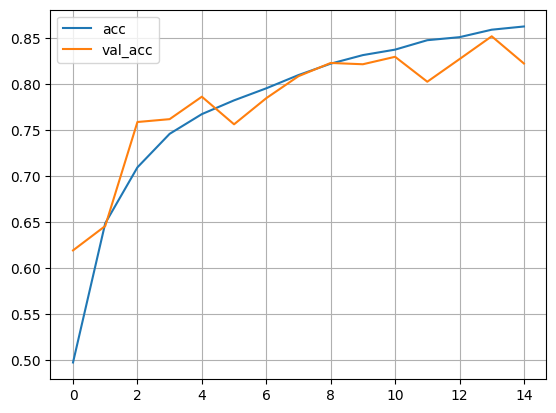

In [39]:
plt.plot(r.history['accuracy'], label="acc")
plt.plot(r.history['val_accuracy'],label ="val_acc")
plt.grid()
plt.legend()
plt.show()

313/313 [==============================] - 1s 2ms/step


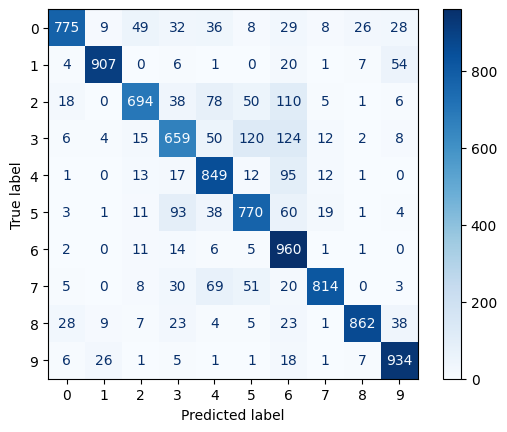

In [40]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Macierz konfuzji
cm = confusion_matrix(y_test, y_pred_labels)

# Wyświetlanie macierzy konfuzji
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()